<a href="https://colab.research.google.com/github/Ananyaya17/AIMLMonth2023/blob/main/mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/mri.zip

Archive:  drive/MyDrive/mri.zip
replace Testing/glioma_tumor/image(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
path = os.listdir('/content/BrainTumorDatasetMaster')
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 1, 'glioma_tumor': 1}

In [ ]:
import cv2
X, Y = [], []
for cls in classes:
    pth = '/content/BrainTumorDatasetMaster/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
X = np.array(X)
y = np.array(Y)
pd.Series(Y).value_counts()

1    2475
0     395
dtype: int64

In [ ]:
X.shape

(2870, 200, 200)

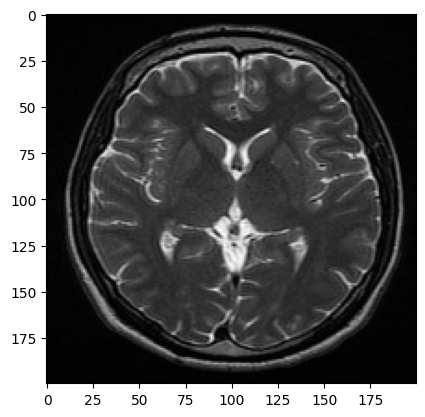

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#lg = LogisticRegression(random_state=42)
lg = LogisticRegression(C=0.1, max_iter=1000)
lg.fit(pca_train, ytrain)
sv = SVC()
sv.fit(pca_train, ytrain)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(pca_train, ytrain)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(pca_train, ytrain)

DecisionTreeClassifier(random_state=42)

In [ ]:
print("Training Score: ", lg.score(pca_train, ytrain))
print("testing Score: ", lg.score(pca_test, ytest))

Training Score:  0.9995644599303136
testing Score:  0.9181184668989547


In [ ]:
print("Training Score: ", sv.score(pca_train, ytrain))
print("testing Score: ", sv.score(pca_test, ytest))

Training Score:  0.9838850174216028
testing Score:  0.9372822299651568


In [ ]:
print("Training Score: ", knn.score(pca_train, ytrain))
print("testing Score: ", knn.score(pca_test, ytest))

Training Score:  0.9446864111498258
testing Score:  0.9372822299651568


In [ ]:
print("Training Score: ", rf.score(pca_train, ytrain))
print("testing Score: ", rf.score(pca_test, ytest))

Training Score:  1.0
testing Score:  0.9651567944250871


In [ ]:
print("Training Score: ", dt.score(pca_train, ytrain))
print("testing Score: ", dt.score(pca_test, ytest))

Training Score:  1.0
testing Score:  0.9320557491289199


In [ ]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  6,  29,  34,  55,  82,  90, 129, 140, 149, 166, 181, 198, 201,
        238, 271, 288, 305, 313, 320, 342, 358, 379, 423, 434, 438, 442,
        448, 457, 465, 483, 486, 506, 512, 519, 529, 539]),)

In [ ]:
pred[6]

1

In [ ]:
#test Model
dec = {0: 'No Tumor', 1:'Tumor'}

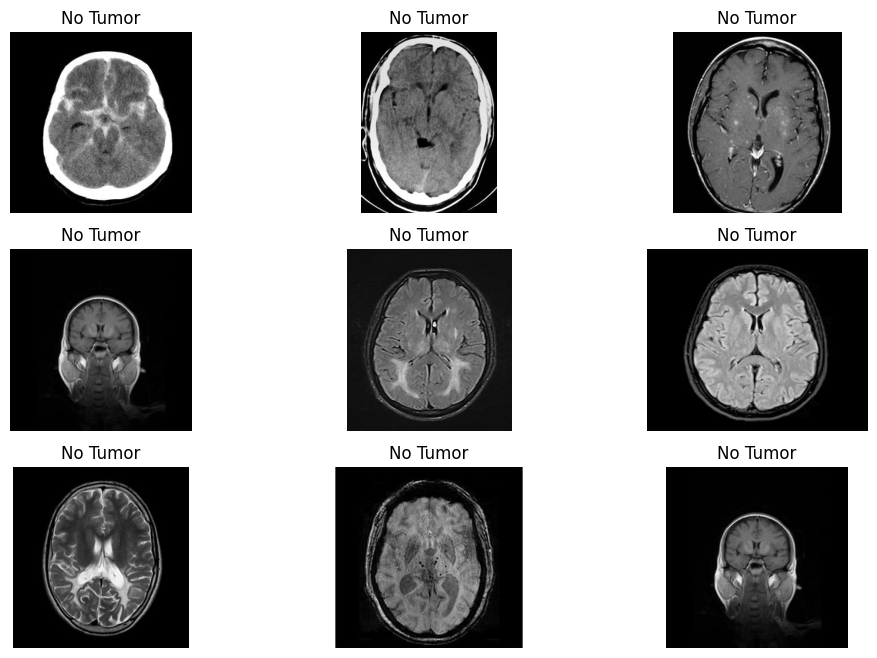

In [ ]:
plt.figure(figsize = (12,8))
p=os.listdir('/content/BrainTumorDatasetMaster/Testing')
c = 1
for i in os.listdir('/content/BrainTumorDatasetMaster/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("/content/BrainTumorDatasetMaster/Testing/no_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

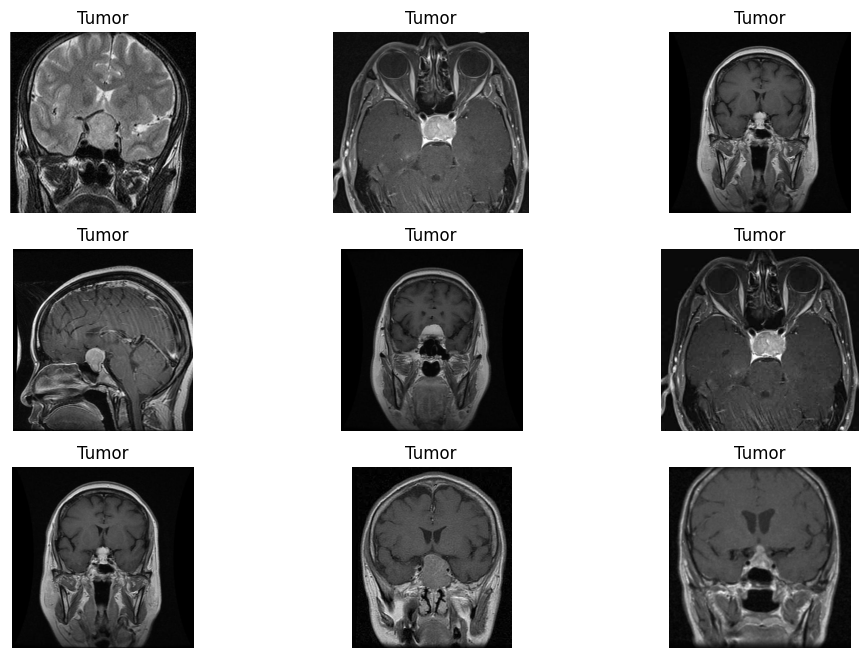

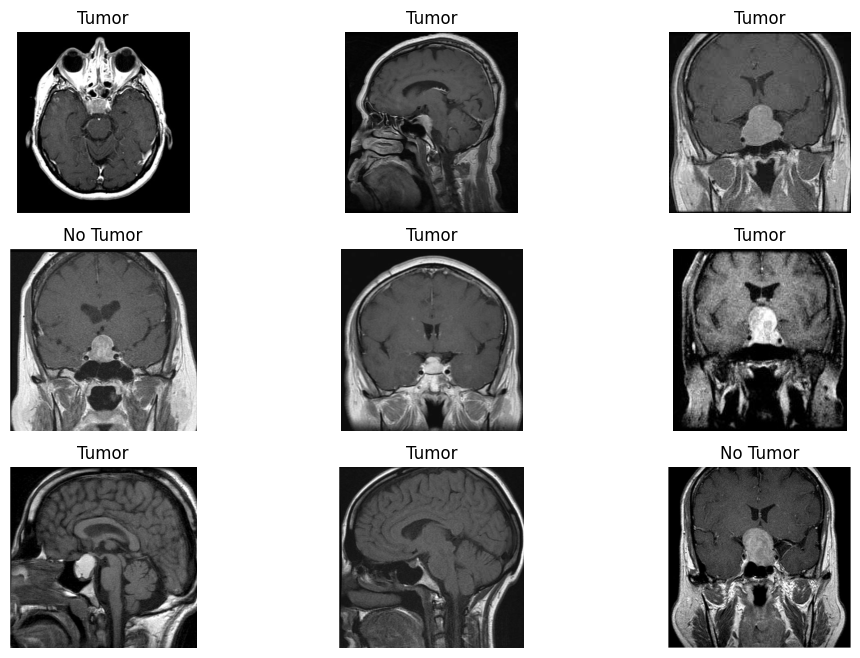

In [ ]:
#ilk 9 image LG
plt.figure(figsize = (12,8))
p=os.listdir('/content/BrainTumorDatasetMaster')
c = 1
for i in os.listdir('/content/BrainTumorDatasetMaster/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("/content/BrainTumorDatasetMaster/Testing/pituitary_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

#son 9 image
plt.figure(figsize=(12, 8))
p = os.listdir('/content/BrainTumorDatasetMaster')
c = 1
file_list = os.listdir('/content/BrainTumorDatasetMaster/Testing/pituitary_tumor/')
for i in file_list[-9:]:
    plt.subplot(3, 3, c)
    img = cv2.imread("/content/BrainTumorDatasetMaster/Testing/pituitary_tumor/" + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1


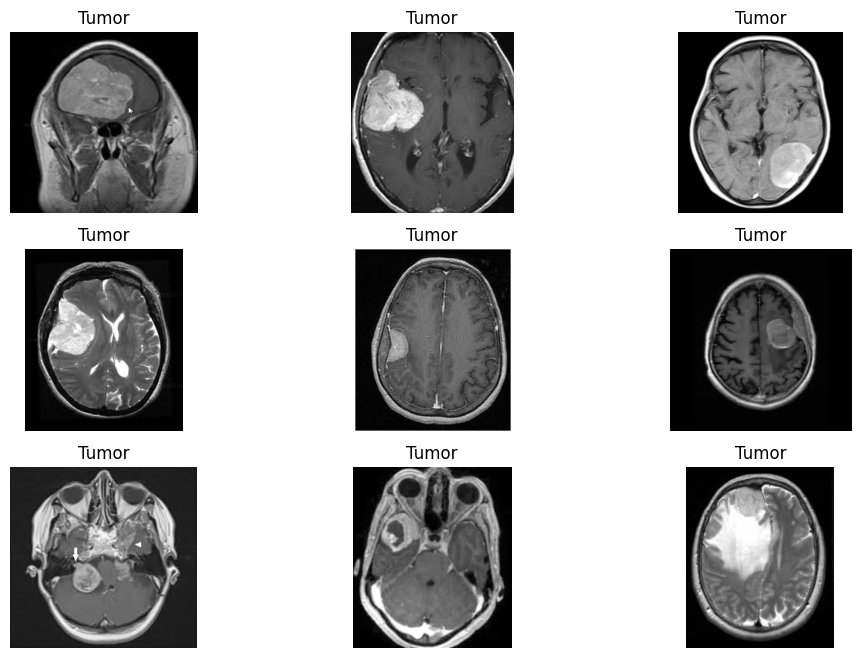

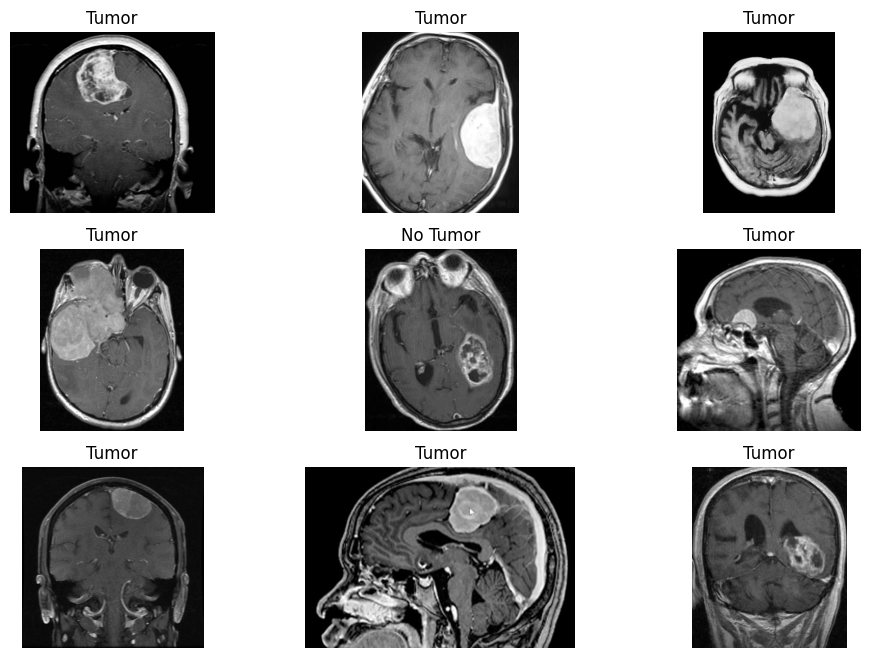

In [ ]:
#ilk 9 image SV
plt.figure(figsize = (12,8))
p=os.listdir('/content/BrainTumorDatasetMaster')
c = 1
for i in os.listdir('/content/BrainTumorDatasetMaster/Testing/meningioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("/content/BrainTumorDatasetMaster/Testing/meningioma_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

#son 9 image
plt.figure(figsize=(12, 8))
p = os.listdir('/content/BrainTumorDatasetMaster')
c = 1
file_list = os.listdir('/content/BrainTumorDatasetMaster/Testing/meningioma_tumor/')
for i in file_list[-9:]:
    plt.subplot(3, 3, c)
    img = cv2.imread("/content/BrainTumorDatasetMaster/Testing/meningioma_tumor/" + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

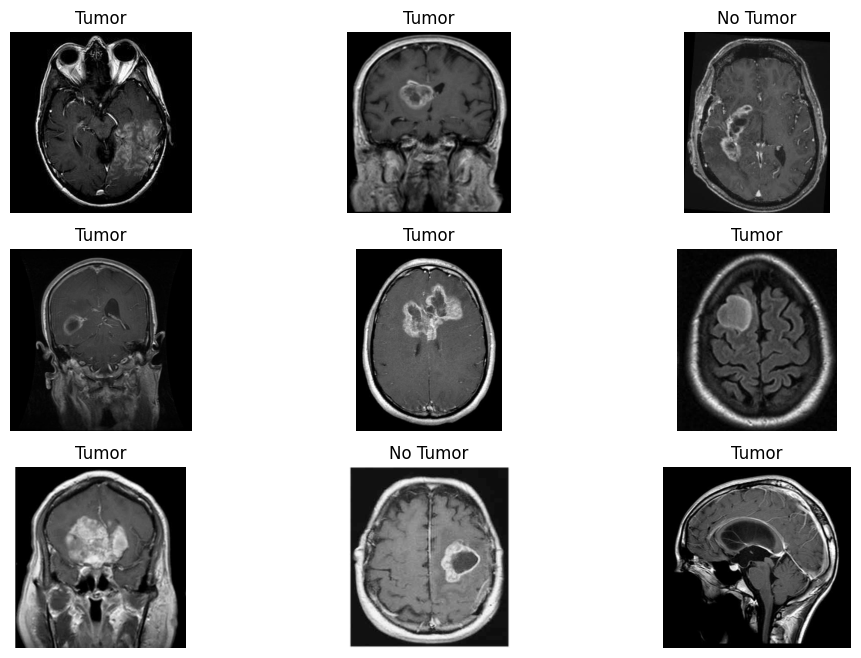

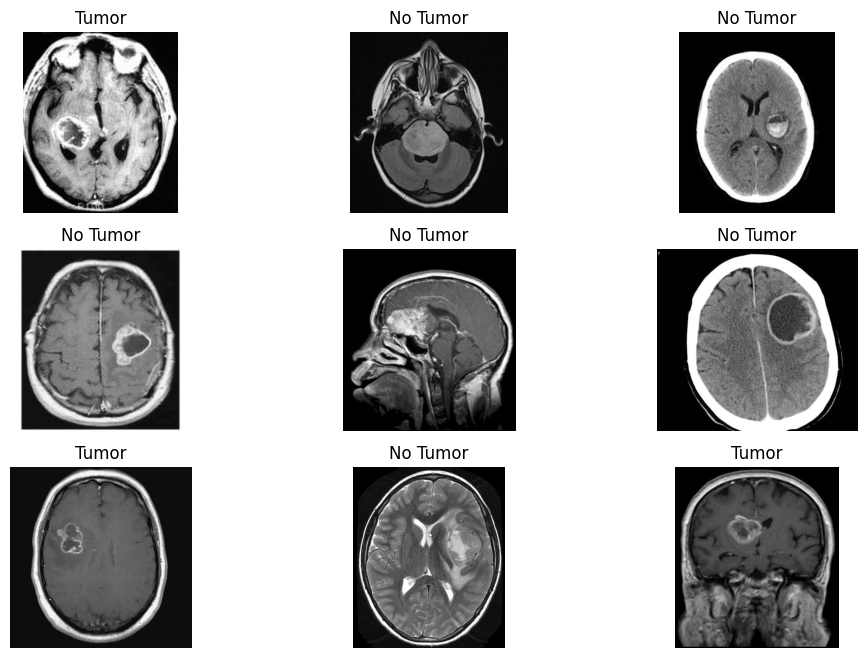

In [ ]:
#ilk 9 image KNN
plt.figure(figsize = (12,8))
p=os.listdir('/content/BrainTumorDatasetMaster')
c = 1
for i in os.listdir('/content/BrainTumorDatasetMaster/Testing/glioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("/content/BrainTumorDatasetMaster/Testing/glioma_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = knn.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

#son 9 image
plt.figure(figsize=(12, 8))
p = os.listdir('/content/BrainTumorDatasetMaster')
c = 1
file_list = os.listdir('/content/BrainTumorDatasetMaster/Testing/glioma_tumor/')
for i in file_list[-9:]:
    plt.subplot(3, 3, c)
    img = cv2.imread("/content/BrainTumorDatasetMaster/Testing/glioma_tumor/" + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = knn.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1


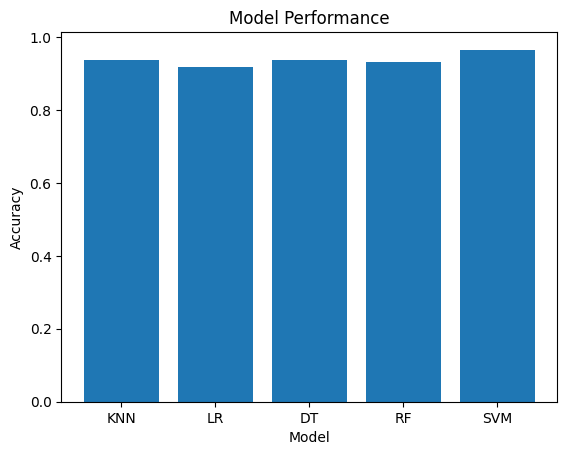

In [ ]:

# evaluate model performance
sv_score = sv.score(pca_test, ytest)
lg_score = lg.score(pca_test, ytest)
knn_score = knn.score(pca_test, ytest)
dt_score = dt.score(pca_test, ytest)
rf_score = rf.score(pca_test, ytest)

#visualing the result
models = ['KNN', 'LR', 'DT', 'RF', 'SVM']
accuracies = [sv_score, lg_score, knn_score, dt_score, rf_score]
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.show()